# **Clustering - Wine Data Set**

---

## **Introduction**

In the following notebook, I will be using a dataset of the chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The dataset can be found [here](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/data).

**The question I will be answering is: Can we cluster the wines into distinct groups based on their chemical composition?**

## **Table of Contents**

1. [Importing Libraries and Data](#1.-Importing-libraries-and-data)
2. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
3. [Data Preprocessing](#3.-Data-Preprocessing)  
   3.1 [Distribution of the data](#3.1-Distribution-of-the-data)  
   3.2 [Removing outliers](#3.2-Removing-outliers)  
   3.3 [Normalizing the data](#3.3-Normalizing-the-data)
4. [Finding the Optimal Number of Clusters](#4.-Finding-the-optimal-number-of-clusters)
5. [Clustering](#5.-Clustering)  
   5.1 [PCA](#5.1-PCA)  
   5.2 [KMeans](#5.2-KMeans)  
   5.3 [Agglomerative Clustering](#5.3-Agglomerative-Clustering)
6. [Conclusion](#6.-Conclusion)


## **1. Importing libraries and data**

---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Ignore warnings, they are mostly about future deprecations
warnings.filterwarnings("ignore", message="X does not have valid feature names")

df = pd.read_csv("./data/wine-clustering.csv")
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **2. Exploratory Data Analysis**

[Back to top](#Table-of-Contents)

---


In [2]:
df.shape

(178, 13)

As we can see the dataset contains 13 columns and 178 rows. The columns are as follows:


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


The dataset contains 11 float64 columns and 2 int64 columns.


In [4]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The standard deviation is quite low for most of the columns. Except for the Proline column. This means that for most of the columns the data is not spread out that much. The Proline column has a high standard deviation which means that the data is spread out more.

What we can also see from the above table is that the data is not normalized. This is important for clustering algorithms as they are sensitive to the scale of the data. We will need to normalize the data before we can apply the clustering algorithms. 

The way we can see this is by looking at the mean and standard deviation of the data. The mean and standard deviation of the data is different for each column. Meaning that the data is not normalized.

For example: the mean of the first column is 13.000618 and the standard deviation is 0.809543. The mean of the second column is 2.336348 and the standard deviation is 1.114004. This is a problem because the clustering algorithms are sensitive to the scale of the data. We will need to normalize the data before we can apply the clustering algorithms.

> Normalization in machine learning refers to the process of scaling and transforming the features of a dataset to a similar range, typically between 0 and 1, to ensure that each feature contributes equally to the analysis and prevents features with larger scales from dominating the learning process.


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no missing values, so we don't need to worry about that.


In [6]:
df.duplicated().sum()

0

Also no duplicates, so we don't need to worry about that either.


## **3. Data Preprocessing**

[Back to top](#Table-of-Contents)

---


Now that we have explored the data, we can move on to the data preprocessing step. Let's first check for outliers in the data.


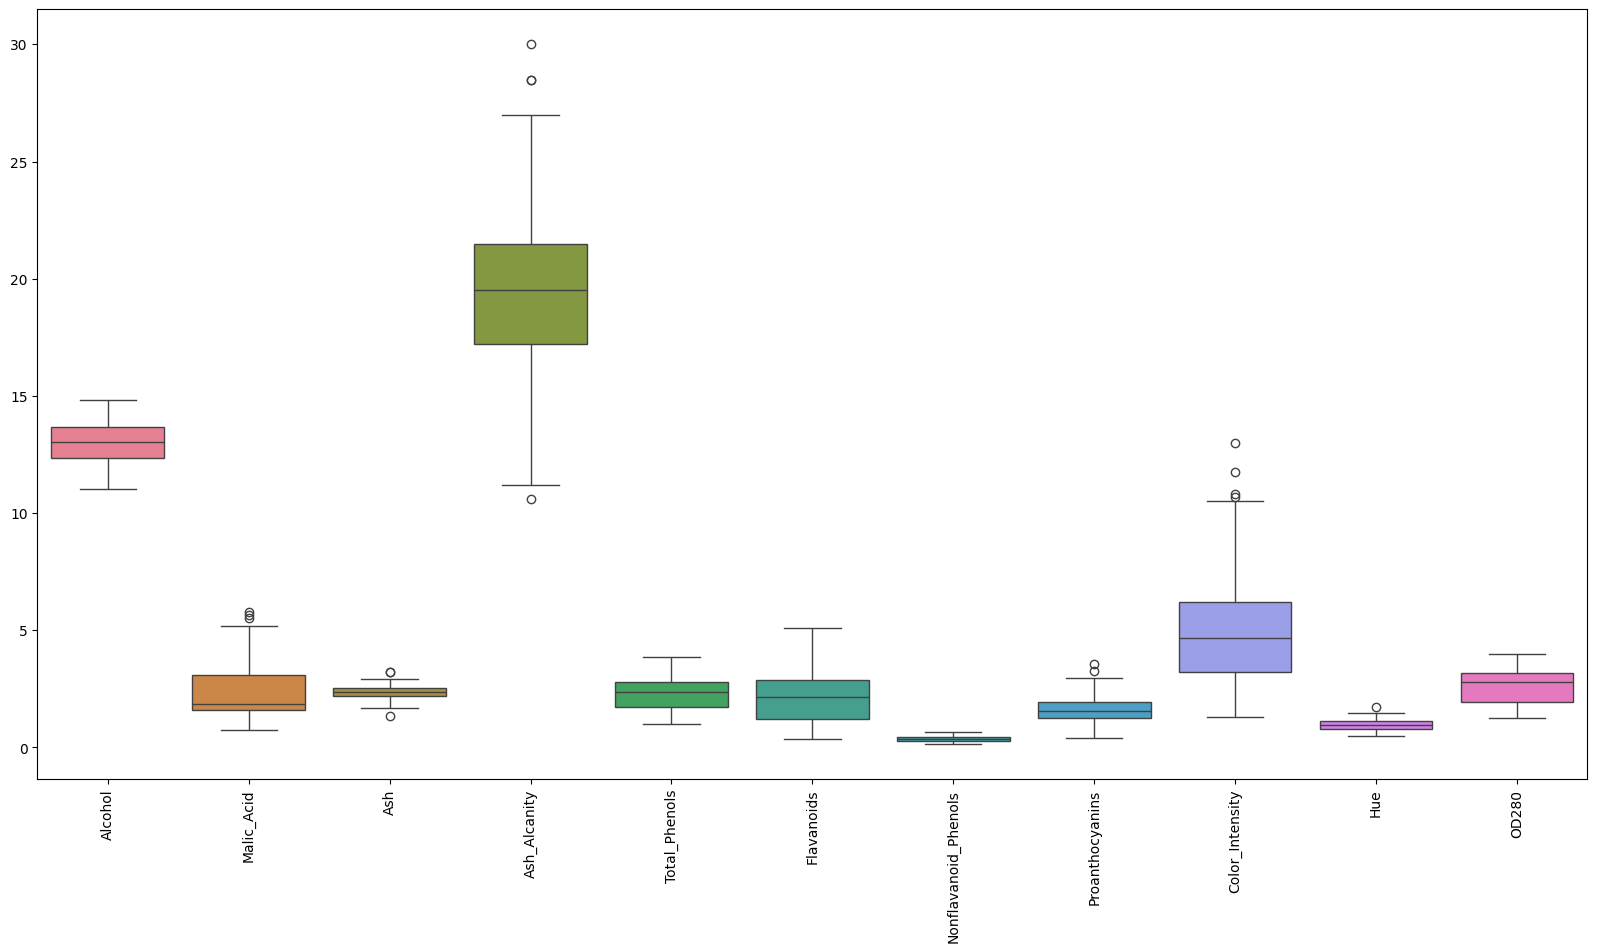

In [7]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(columns=['Proline', 'Magnesium'])) # Excluding Proline and Magnesium because of their large scale
plt.xticks(rotation=90)
plt.show()

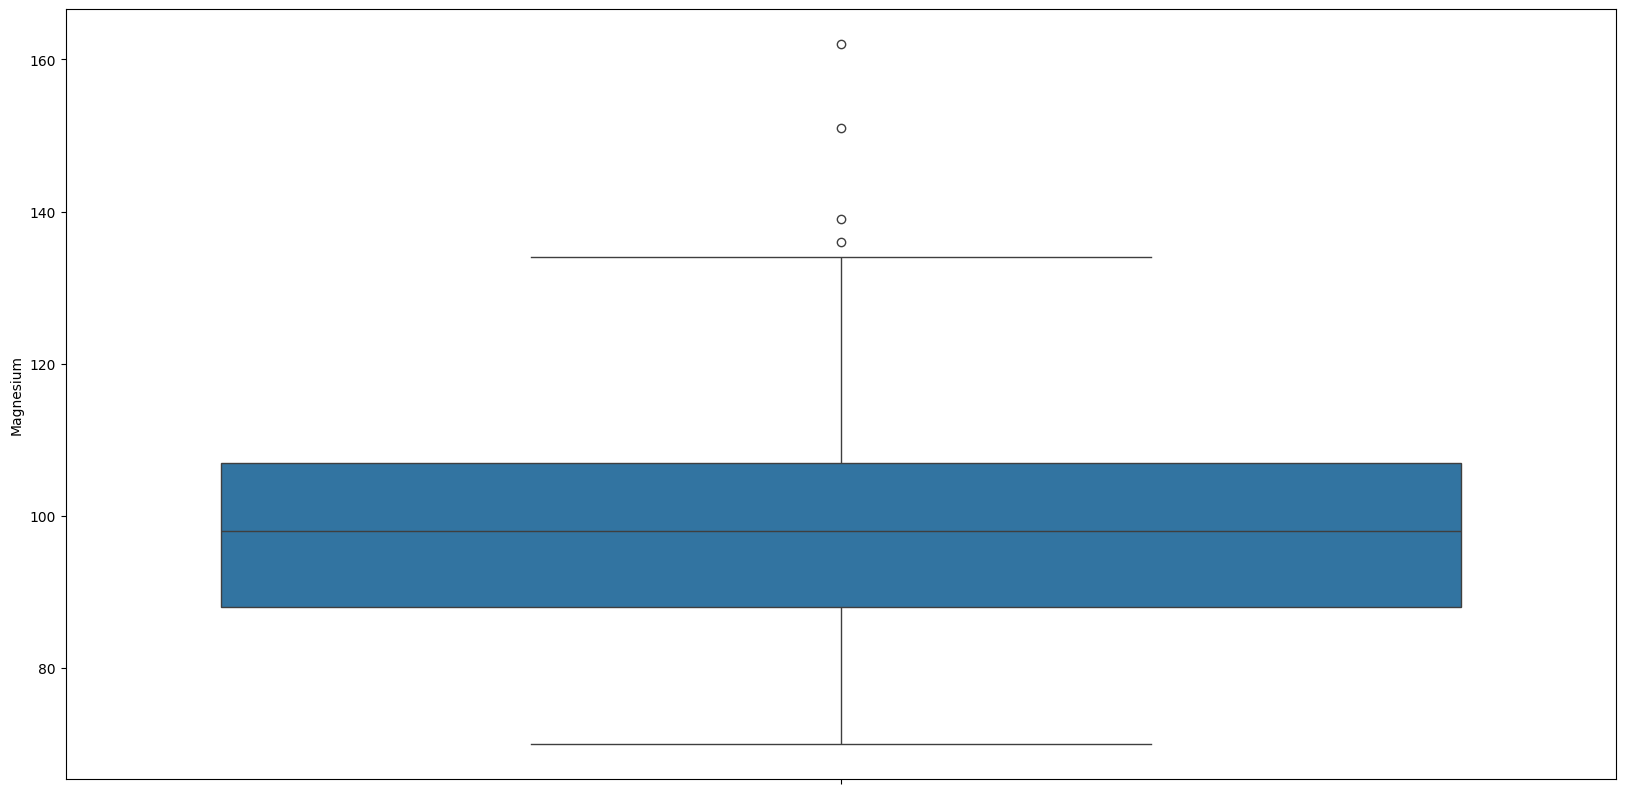

In [8]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df['Magnesium'])
plt.xticks(rotation=90)
plt.show()

I'm plotting Magnesium seperately because it has a different scale than the other features. This way we can see the outliers better. Also, Proline doesn't have any outliers, so I'm not plotting that one.


#### **3.1 Distribution of the data**


It looks like there are some outliers. For choosing the best method to deal with the outliers, we need to know the distribution of the data.


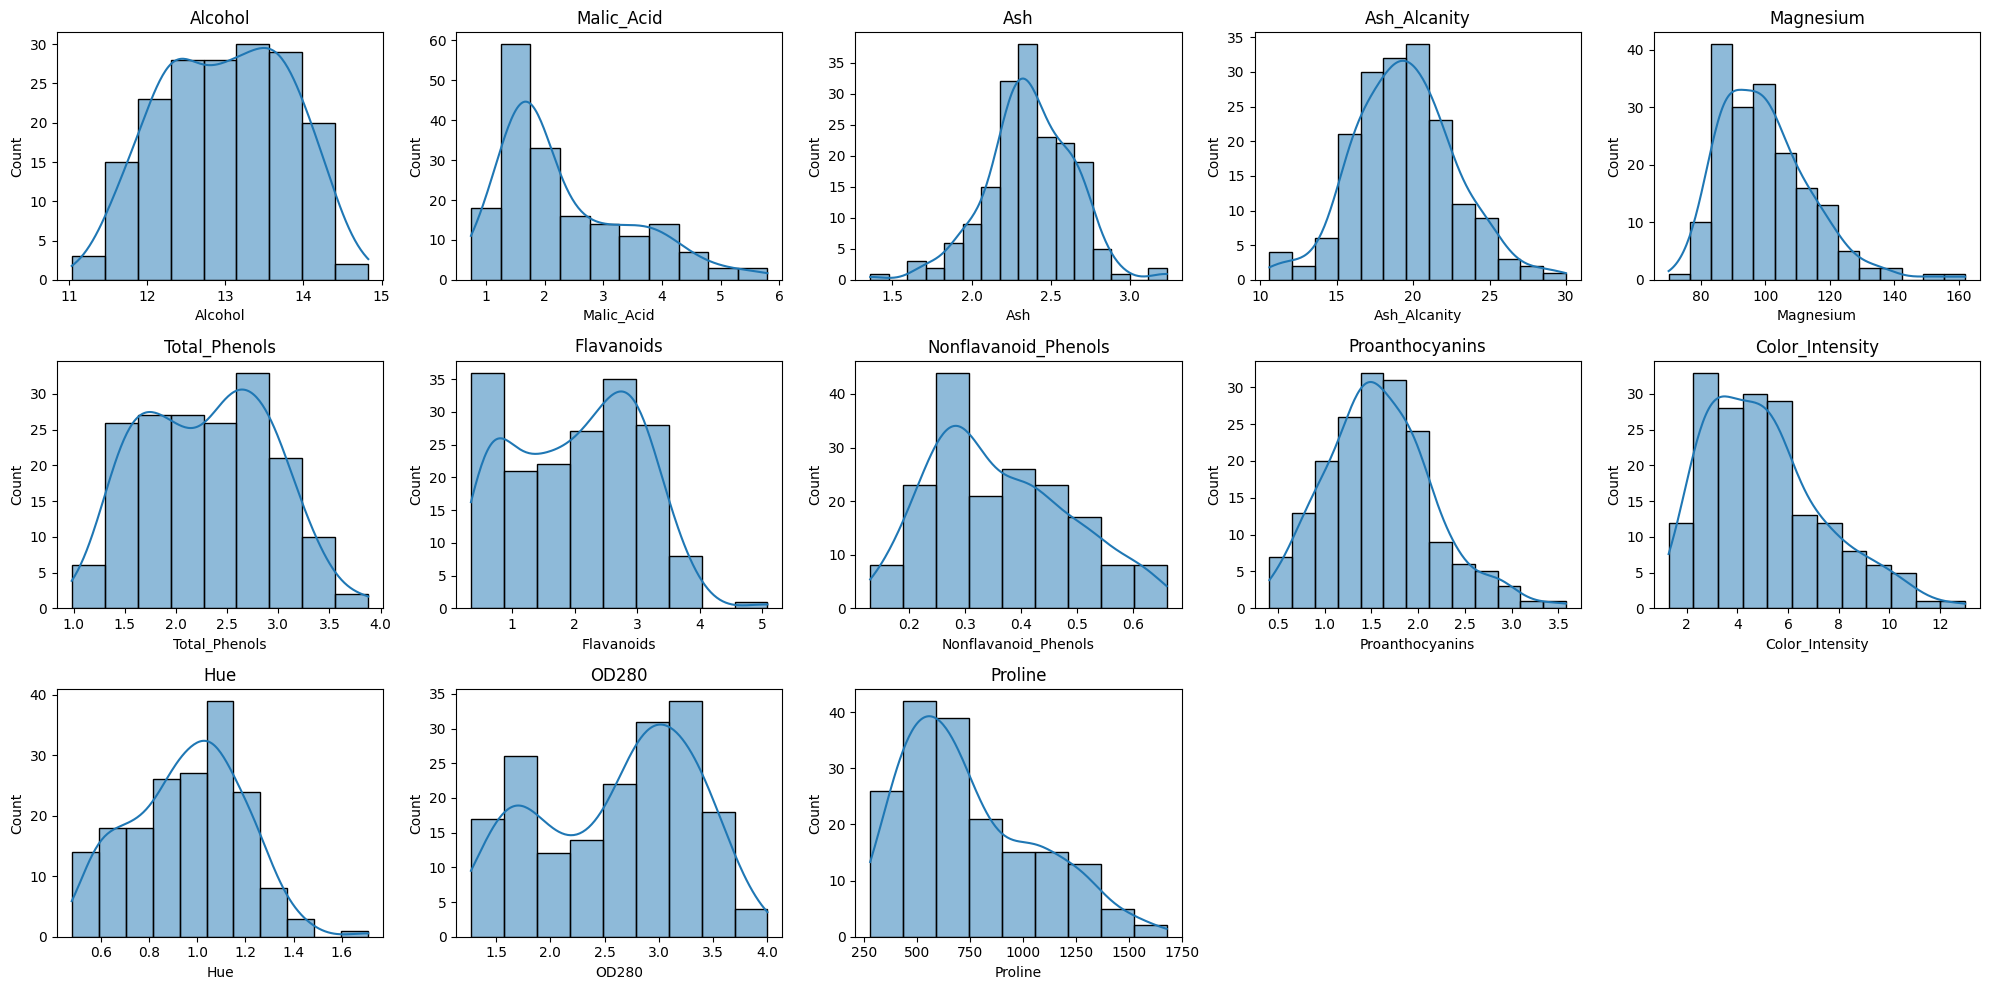

In [9]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 5, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    
plt.tight_layout()
plt.show()

The distribution is not the same for all the columns. Some columns have a normal distribution, some are right-skewed, and some are bi-modal. It's hard to tell which ones are normal and which ones are not. I will use `normaltest` from `scipy.stats` to check if the data is normally distributed. If the p-value is greater than 0.05, then the data is normally distributed.


In [10]:
normal_distributions = []
for col in df.columns:
    _, p = stats.normaltest(df[col])
    if p > 0.05: # 0.05 is usually used as the threshold for normality
        normal_distributions.append(col)
normal_distributions

['Ash_Alcanity', 'Hue']

`Ash_Alcanity` and `Hue` are considered normally distributed. The rest of the columns are not normally distributed. For the normally distributed columns, I will use the Z-score method to remove the outliers. For the non-normally distributed columns, I will use the IQR method to remove the outliers.

#### **3.2 Removing outliers**


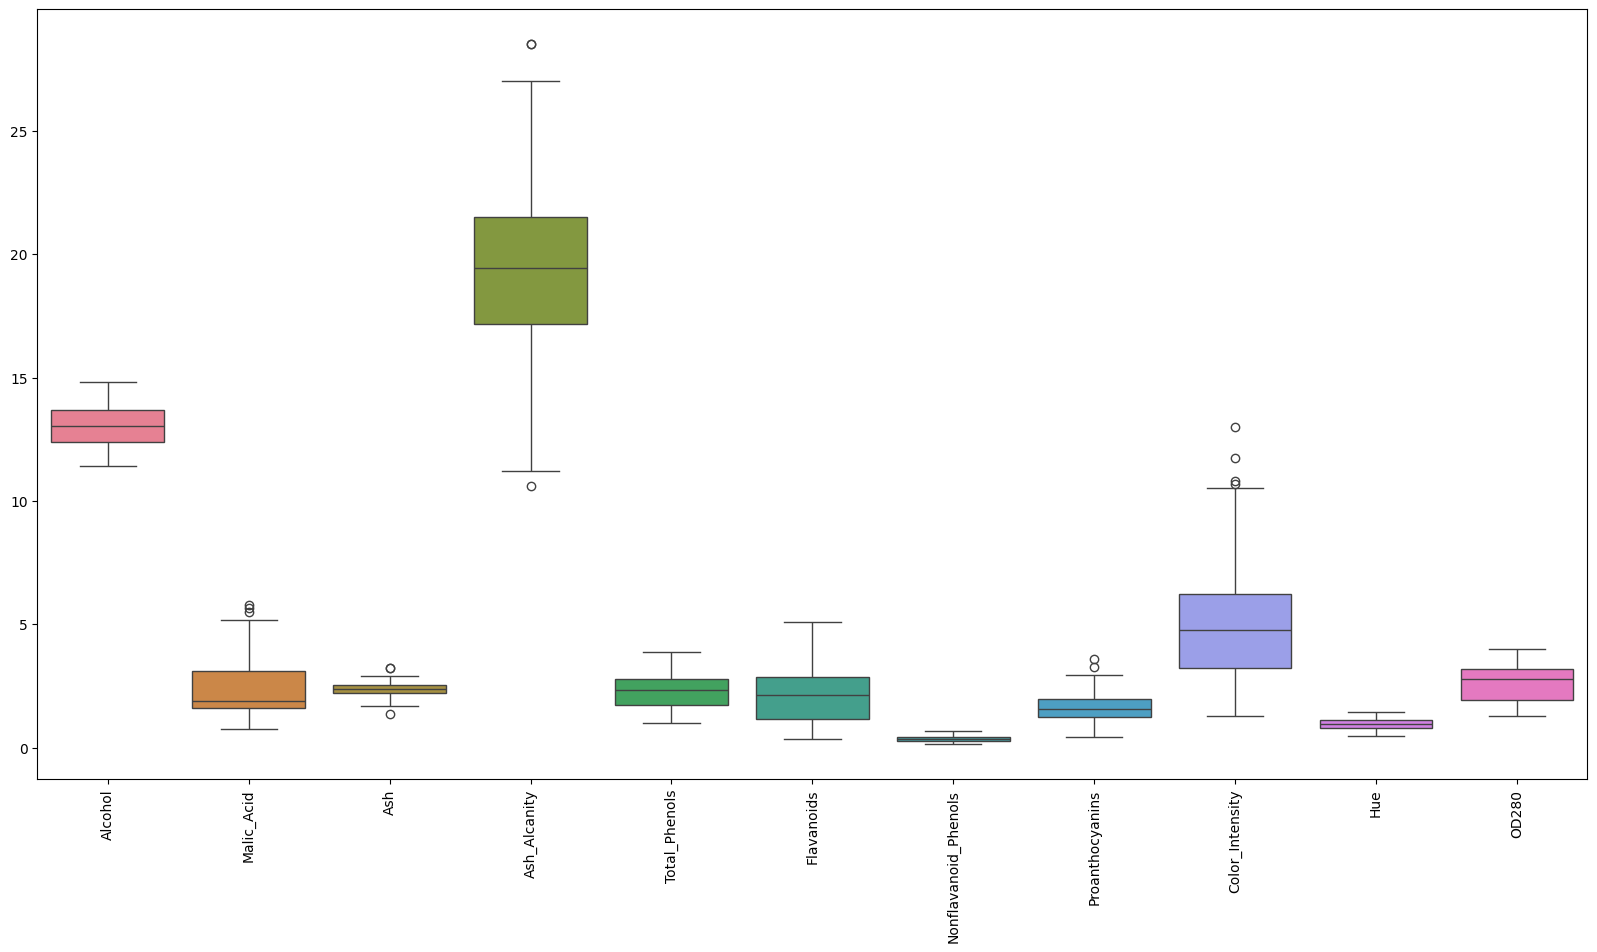

In [12]:
z = np.abs(stats.zscore(df[['Hue', 'Ash_Alcanity']]))
df = df[(z < 3).all(axis=1)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(columns=['Proline', 'Magnesium']))
plt.xticks(rotation=90)
plt.show()

Now I will use IQR to remove the outliers in the non-normal columns.


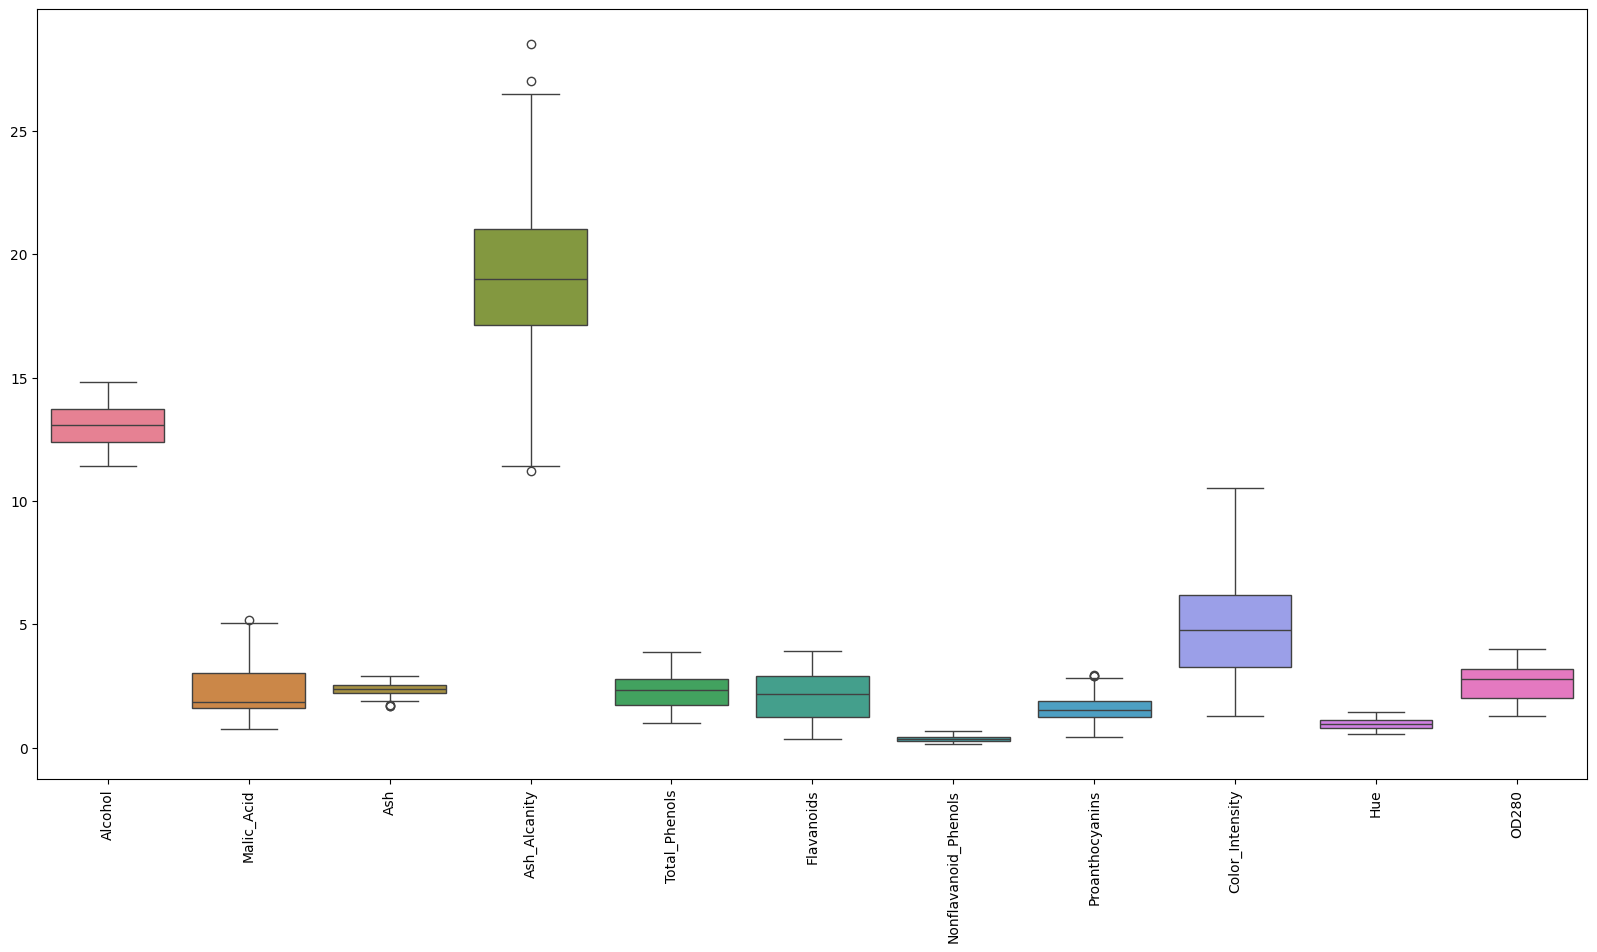

In [13]:
df_excluded = df.drop(columns=['Hue', 'Ash_Alcanity'])
Q1 = df_excluded.quantile(0.25)
Q3 = df_excluded.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df_excluded < (Q1 - 1.5 * IQR)) | (df_excluded > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 10))
sns.boxplot(data=df.drop(columns=['Proline', 'Magnesium']))
plt.xticks(rotation=90)
plt.show()

#### **3.3 Normalizing the data**


Now that most of the outliers are removed, we can move on to the next step, which is normalizing the data.

> Normalization in machine learning refers to the process of scaling and transforming the features of a dataset to a similar range, typically between 0 and 1, to ensure that each feature contributes equally to the analysis and prevents features with larger scales from dominating the learning process.


In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.498694,-0.571803,0.265108,-1.196835,2.317693,0.812339,1.036066,-0.650108,1.416455,0.302474,0.372989,1.833592,0.953572
1,0.209463,-0.504615,-0.933620,-2.624146,0.122459,0.573705,0.729840,-0.813644,-0.515203,-0.294634,0.419136,1.095811,0.907086
2,0.159396,0.052079,1.257160,-0.223668,0.203764,0.812339,1.219802,-0.486571,2.410972,0.321429,0.326843,0.769485,1.325459
3,1.673930,-0.341446,0.554457,-0.807568,1.179423,2.482781,1.474991,-0.977180,1.206076,1.326086,-0.457648,1.166752,2.239681
4,0.259531,0.272837,2.083869,0.554865,1.585948,0.812339,0.658387,0.249342,0.517564,-0.323067,0.372989,0.428971,-0.069117


## **4. Finding the optimal number of clusters**

[Back to top](#Table-of-Contents)

---

Now that the data is preprocessed, we can move on to the clustering step. The first step in clustering is to find the optimal number of clusters. There are several methods to find the optimal number of clusters, such as the elbow method, the silhouette score, and the gap statistic. In this notebook, I will use the elbow method to find the optimal number of clusters.


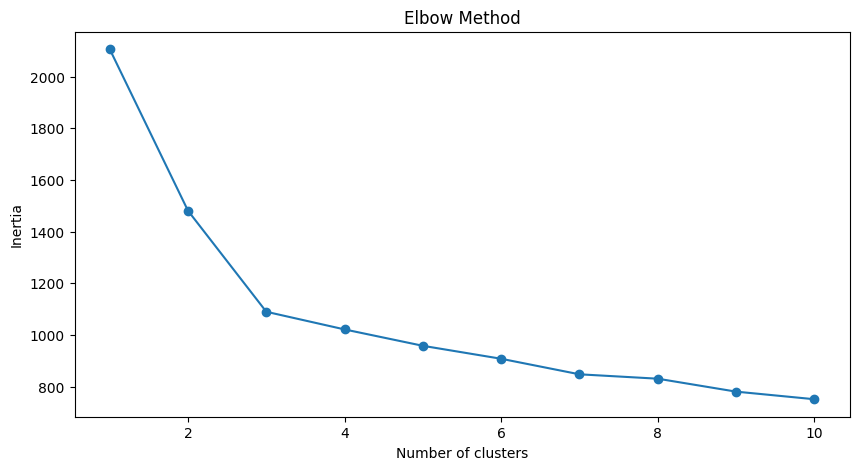

In [15]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

From the above plot, the optimal number of clusters seems to be 3. This is because the inertia decreases significantly until 3 clusters, after which the decrease is less significant. To double check, I will also use the silhouette score.


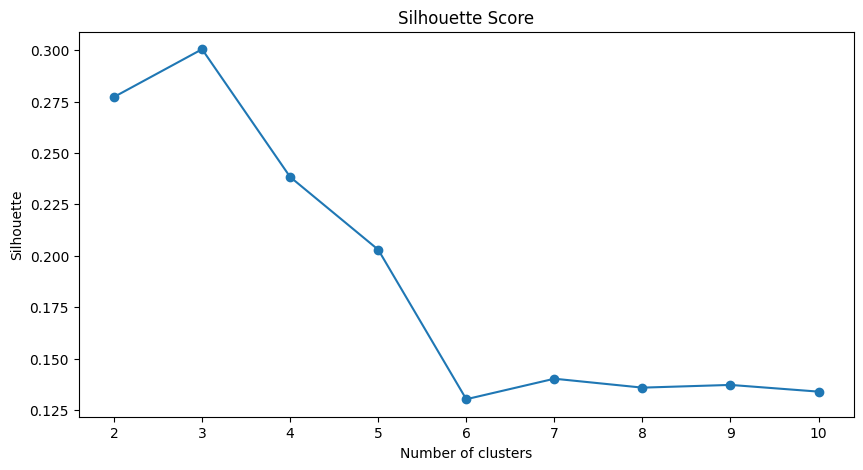

In [16]:
silhouette = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_scaled)
    silhouette.append(silhouette_score(df_scaled, kmeans.labels_))
    
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette')
plt.show()

For the silhoutte score, the higher the score, the better. We can see the highest score is for 3. At 0.300, the score is not very high, but it's the highest of all the scores. This confirms that 3 clusters is the optimal number of clusters.


## **5. Clustering**

[Back to top](#Table-of-Contents)

---

Now that we know the optimal number of clusters is 3, we can move on to the clustering step. I will use KMeans and Agglomerative clustering to cluster the data.


In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


#### **5.1 PCA**

Before starting with the clustering, I will use PCA to reduce the dimensionality of the data. This will make it easier to visualize the clusters. The reason I'm using PCA is because the data has 13 dimensions, which makes it hard to visualize the clusters. PCA will reduce the dimensions to 2, which makes it easier to visualize the clusters.

> PCA is a method used to reduce the number of variables in a dataset while preserving the variance in the data. It does this by creating new variables, called principal components, that are linear combinations of the original variables. These new variables capture the most important information in the data, while discarding the less important information.


In [18]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

print(df_pca.head())

print("Ratio of explained variance: ", pca.explained_variance_ratio_)
print("Sum of explained variance: ", pca.explained_variance_ratio_.sum())


        PC1       PC2
0  3.493757 -1.491398
1  2.273074  0.330031
2  2.627175 -0.823046
3  3.944354 -2.587638
4  1.018520 -0.965696
Ratio of explained variance:  [0.3873047  0.20423915]
Sum of explained variance:  0.5915438529170943


PC1 explains 38.73% of the variance and PC2 explains 20.42% of the variance. Together they explain 59.15% of the variance. Variance is the spread of the data. The higher the variance, the more spread out the data is. The lower the variance, the more clustered the data is. In this case, the data is not very spread out, as the variance is only 59.15%. This means that the data is clustered.


#### **5.2 KMeans**


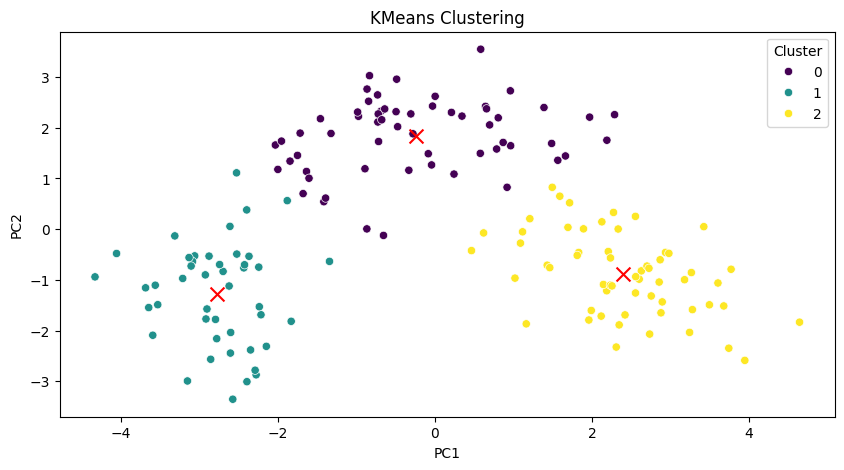

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_scaled)
df_pca['Cluster'] = kmeans.labels_

centroids = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100)
plt.title('KMeans Clustering')
plt.show()

KMeans seems to have done a good job at clustering the data. The clusters are clearly separated and the data points are close to the centroids. Let's see how the other clustering algorithms perform.


#### **5.3 Agglomerative Clustering**

> In simple terms, agglomerative clustering is a method used to group similar data points together. It starts by treating each data point as a single cluster and then merges the closest clusters together until all the data points are in a single cluster.


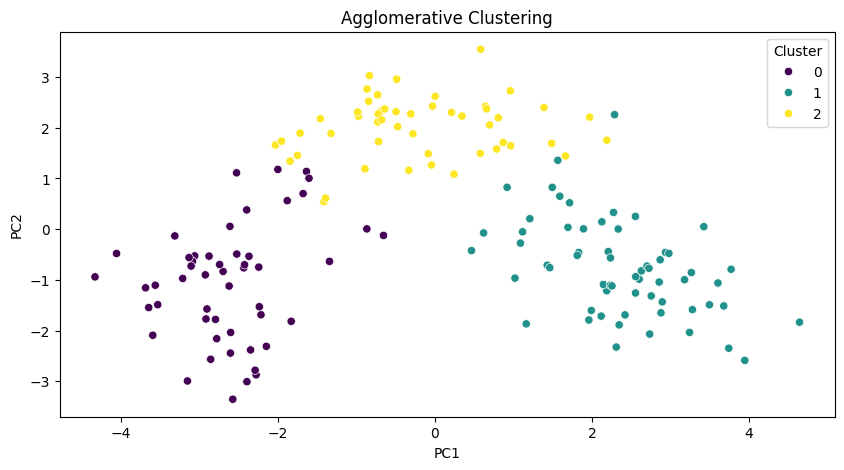

In [20]:
agg = AgglomerativeClustering(n_clusters=3)
df_pca['Cluster'] = agg.fit_predict(df_scaled)

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

The result of the agglomerative clustering is similar to the KMeans clustering. It differs slightly, as the cluster with the number 2 is a bit smaller.


## **6. Conclusion**

[Back to top](#Table-of-Contents)

---

In this analysis, we explored a dataset containing chemical analysis data of wines derived from three different cultivars. Our objective was to cluster the wines based on their chemical composition using clustering algorithms.

After preprocessing the data by removing outliers and normalizing the features, we proceeded with the clustering step. We used both KMeans and Agglomerative Clustering algorithms to cluster the data.

First, we used Principal Component Analysis (PCA) to reduce the dimensionality of the data and facilitate visualization. PCA revealed that a significant portion of the variance in the data (approximately 59.15%) could be explained by two principal components. Then we applied KMeans clustering with 3 clusters, as determined by the elbow method and silhouette score analysis. The KMeans algorithm successfully clustered the data, separating the wines into distinct groups. The centroids of the clusters were visualized along with the data points in the PCA space. Lastly we employed Agglomerative Clustering, another hierarchical clustering algorithm, to cluster the data. The results of Agglomerative Clustering were similar to those of KMeans, with the wines grouped into three distinct clusters.

Overall, both clustering algorithms yielded meaningful results, effectively grouping the wines based on their chemical composition. Further analysis could involve exploring the characteristics of each cluster to understand the differences between the wine cultivars and potentially provide insights for wine producers or sommeliers.